In [43]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [54]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = './dataset6.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./dataset6')
zip_ref.close()

In [55]:
base_dir = './'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [56]:
# membuat direktori untuk data training dan data validation
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [57]:
# menentukan direktori untuk tiap kategori gambar 
jerawat_dir = os.path.join(base_dir,'./dataset6/jerawat')
kerutan_dir = os.path.join(base_dir, './dataset6/kerutan')
komedo_dir = os.path.join(base_dir, './dataset6/komedo')
kusam_dir = os.path.join(base_dir, './dataset6/kusam')

In [58]:
# membagi data training dan data validation menggunakan library sklearn dengan test_size 0.2
from sklearn.model_selection import train_test_split
train_jerawat_dir, val_jerawat_dir = train_test_split(os.listdir(jerawat_dir), test_size = 0.2)
train_kerutan_dir, val_kerutan_dir = train_test_split(os.listdir(kerutan_dir), test_size = 0.2)
train_komedo_dir, val_komedo_dir = train_test_split(os.listdir(komedo_dir), test_size = 0.2)
train_kusam_dir, val_kusam_dir = train_test_split(os.listdir(kusam_dir), test_size = 0.2)

In [59]:
# menentukan direktori training data untuk setiap kategori (kelas)
train_jerawat = os.path.join(train_dir, 'jerawat')
train_kerutan = os.path.join(train_dir, 'kerutan')
train_komedo = os.path.join(train_dir, 'komedo')
train_kusam = os.path.join(train_dir, 'kusam')

In [60]:
# menentukan direktori validation data untuk setiap kategori (kelas)
val_jerawat= os.path.join(validation_dir, 'jerawat')
val_kerutan = os.path.join(validation_dir, 'kerutan')
val_komedo = os.path.join(validation_dir, 'komedo')
val_kusam = os.path.join(validation_dir, 'kusam')

In [61]:
# membuat direktori baru untuk data training untuk setiap kategori (kelas) dalam directory train dan val
os.mkdir(os.path.join(train_jerawat))
os.mkdir(os.path.join(train_kerutan))
os.mkdir(os.path.join(train_komedo))
os.mkdir(os.path.join(train_kusam))

In [62]:
# membuat direktori baru untuk data validation untuk setiap kategori (kelas) dalam directory train dan val
os.mkdir(os.path.join(val_jerawat))
os.mkdir(os.path.join(val_kerutan))
os.mkdir(os.path.join(val_komedo))
os.mkdir(os.path.join(val_kusam))

In [63]:
# meng-copy data training ke dalam direktori baru menggunakan library shutil
import shutil
for i in train_jerawat_dir:
  shutil.copy(os.path.join(jerawat_dir, i), os.path.join(train_jerawat, i))
for i in train_kerutan_dir:
  shutil.copy(os.path.join(kerutan_dir,i), os.path.join(train_kerutan,i))
for i in train_komedo_dir:
  shutil.copy(os.path.join(komedo_dir,i), os.path.join(train_komedo,i))
for i in train_kusam_dir:
  shutil.copy(os.path.join(kusam_dir,i), os.path.join(train_kusam,i))

In [64]:
# meng-copy data testing ke dalam direktori baru menggunakan library shutil
for i in val_jerawat_dir:
  shutil.copy(os.path.join(jerawat_dir, i), os.path.join(val_jerawat, i))
for i in val_kerutan_dir:
  shutil.copy(os.path.join(kerutan_dir,i), os.path.join(val_kerutan,i))
for i in val_komedo_dir:
  shutil.copy(os.path.join(komedo_dir,i), os.path.join(val_komedo,i))
for i in val_kusam_dir:
  shutil.copy(os.path.join(kusam_dir,i), os.path.join(val_kusam,i))

In [65]:
# mengecek jumlah data training
jmltrainjerawat = len(os.listdir('./train/jerawat'))
jmltrainkerutan = len(os.listdir('./train/kerutan'))
jmltrainkomedo = len(os.listdir('./train/komedo'))
jmltrainkusam = len(os.listdir('./train/kusam'))
print("Jumlah data training kategori jerawat: ", jmltrainjerawat)
print("Jumlah data training kategori kerutan: ", jmltrainkerutan)
print("Jumlah data training kategori komedo: ", jmltrainkomedo)
print("Jumlah data training kategori kusam: ", jmltrainkusam)

Jumlah data training kategori jerawat:  200
Jumlah data training kategori kerutan:  200
Jumlah data training kategori komedo:  200
Jumlah data training kategori kusam:  200


In [66]:
# mengecek jumlah data validation
jmlvaljerawat = len(os.listdir('./val/jerawat'))
jmlvalkerutan = len(os.listdir('./val/kerutan'))
jmlvalkomedo = len(os.listdir('./val/komedo'))
jmlvalkusam = len(os.listdir('./val/kusam'))
print("Jumlah data validation kategori jerawat: ", jmlvaljerawat)
print("Jumlah data validation kategori kerutan: ", jmlvalkerutan)
print("Jumlah data validation kategori komedo: ", jmlvalkomedo)
print("Jumlah data validation kategori kusam: ", jmlvalkusam)

Jumlah data validation kategori jerawat:  50
Jumlah data validation kategori kerutan:  50
Jumlah data validation kategori komedo:  50
Jumlah data validation kategori kusam:  50


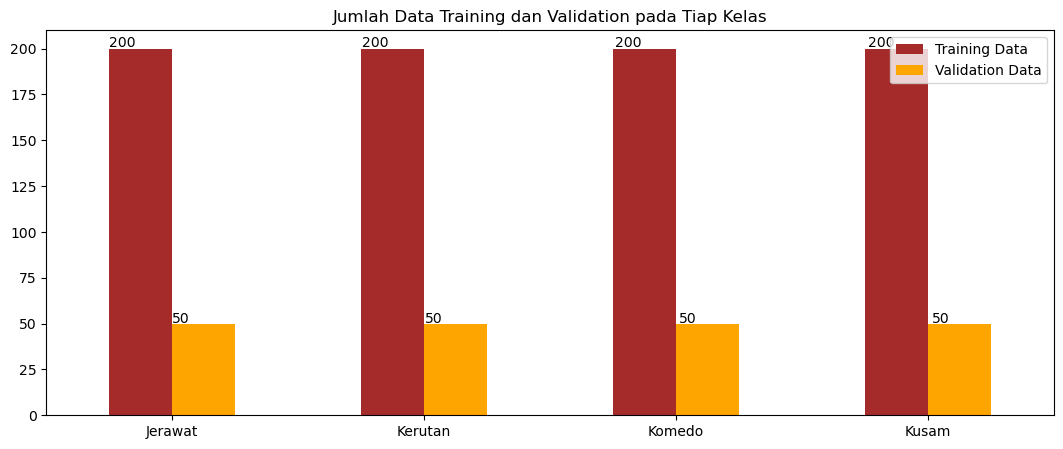

In [67]:
import pandas as pd

# visualisasi jumlah data training dan data validation
tr = [jmltrainjerawat, jmltrainkerutan, jmltrainkomedo, jmltrainkusam]
va = [jmlvaljerawat, jmlvaljerawat, jmlvalkomedo, jmlvalkusam]
index = ['Jerawat', 'Kerutan', 'Komedo', 'Kusam']
data_am = pd.DataFrame({'Training Data': tr, 'Validation Data': va}, index=index)
ax = data_am.plot.bar(rot=0, color=['brown', 'orange'], figsize=(13,5))
ax.set_title("Jumlah Data Training dan Validation pada Tiap Kelas")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [16]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [69]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(224, 224),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(224, 224), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 800 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [76]:
len(train_dir)

7

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
# Membangun model MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)


9420800/9406464 [==============================] - 8s 1us/step


In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [22]:
history = model.fit(
                train_generator,
                steps_per_epoch=32,  # berapa step yang akan dieksekusi pada setiap epoch
                epochs=5,
                validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                validation_steps=32,  # berapa batch yang akan dieksekusi pada setiap epoch
                verbose=2)

Epoch 1/5
32/32 - 36s - loss: 1.4629 - accuracy: 0.5469 - val_loss: 5.2006 - val_accuracy: 0.3828 - 36s/epoch - 1s/step
Epoch 2/5
32/32 - 25s - loss: 1.2326 - accuracy: 0.5625 - val_loss: 8.3557 - val_accuracy: 0.2578 - 25s/epoch - 792ms/step
Epoch 3/5
32/32 - 26s - loss: 1.2530 - accuracy: 0.5391 - val_loss: 5.5647 - val_accuracy: 0.2656 - 26s/epoch - 814ms/step
Epoch 4/5
32/32 - 25s - loss: 1.2024 - accuracy: 0.5547 - val_loss: 5.4702 - val_accuracy: 0.3047 - 25s/epoch - 778ms/step
Epoch 5/5
32/32 - 24s - loss: 1.2141 - accuracy: 0.5469 - val_loss: 2.3679 - val_accuracy: 0.2344 - 24s/epoch - 753ms/step


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


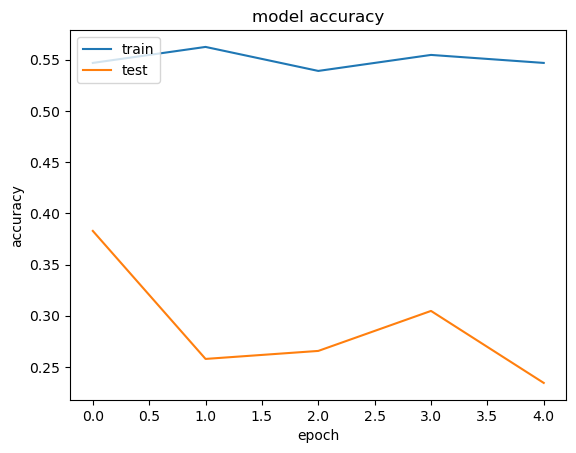

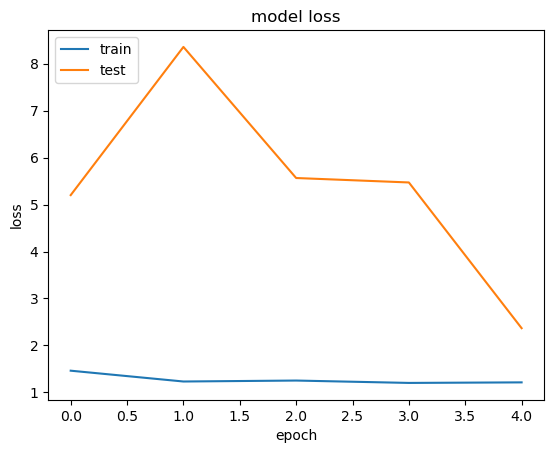

In [23]:
from matplotlib import pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

# Load MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the first 54 layers (up to the bottleneck block)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Add custom head on top of MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
num_classes = 4  # Ganti dengan jumlah kelas dalam dataset Anda
predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Found 640 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [70]:
%%time 
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
200/200 [==============================] - 68s 318ms/step - loss: 5.7247 - accuracy: 0.5575 - val_loss: 21.0915 - val_accuracy: 0.2500
Epoch 2/10
200/200 [==============================] - 60s 301ms/step - loss: 1.7279 - accuracy: 0.6913 - val_loss: 6.4257 - val_accuracy: 0.2800
Epoch 3/10
200/200 [==============================] - 60s 299ms/step - loss: 0.9718 - accuracy: 0.7700 - val_loss: 11.4435 - val_accuracy: 0.2600
Epoch 4/10
200/200 [==============================] - 59s 297ms/step - loss: 0.7936 - accuracy: 0.7825 - val_loss: 9.5668 - val_accuracy: 0.2500
Epoch 5/10
200/200 [==============================] - 59s 293ms/step - loss: 0.7021 - accuracy: 0.7962 - val_loss: 13.8669 - val_accuracy: 0.2850
Epoch 6/10
200/200 [==============================] - 60s 299ms/step - loss: 0.5578 - accuracy: 0.8550 - val_loss: 9.1400 - val_accuracy: 0.2950
Epoch 7/10
200/200 [==============================] - 57s 282ms/step - loss: 0.5966 - accuracy: 0.8175 - val_loss: 1.7782 - val

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


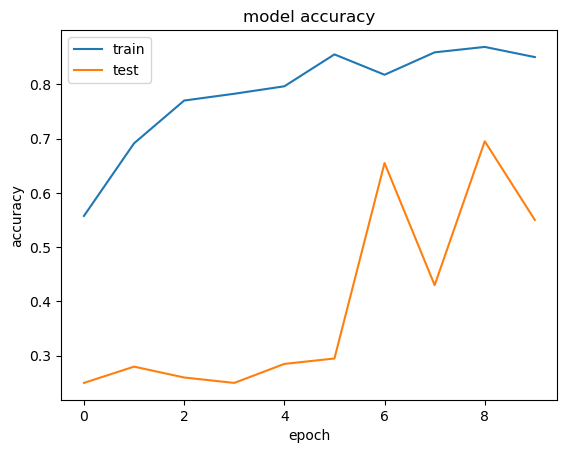

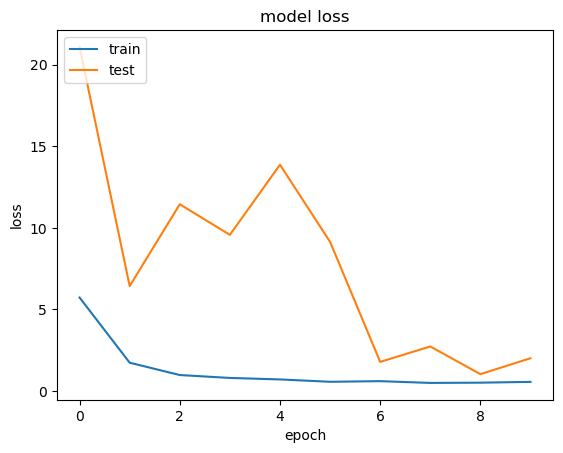

In [71]:
from matplotlib import pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
%%time
model.evaluate(validation_generator)

50/50 [==============================] - 10s 196ms/step - loss: 2.0104 - accuracy: 0.5550
CPU times: total: 46.2 s
Wall time: 9.95 s


[2.010371685028076, 0.5550000071525574]

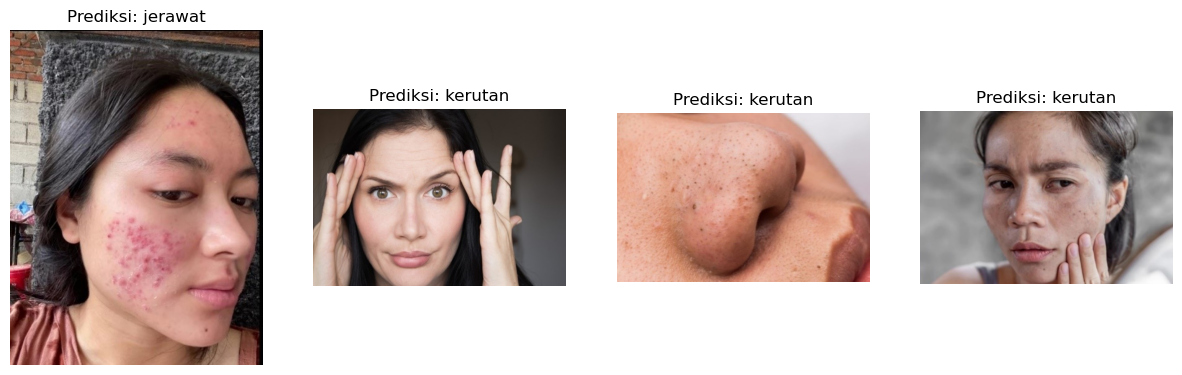

In [73]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path ke folder dengan citra-citra yang ingin diuji
folder_path = 'test'

# Membaca citra dari folder dan melakukan prediksi
predictions = []
image_names = []

for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Pastikan hanya file gambar yang dibaca
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ubah mode warna ke RGB jika diperlukan
        image = cv2.resize(image, (224, 224))  # Sesuaikan ukuran gambar dengan ukuran input model

        # Normalisasi gambar
        image = image / 255.0  # Normalisasi sesuai dengan preprocessing yang dilakukan saat pelatihan

        # Lakukan prediksi
        prediction = model.predict(np.expand_dims(image, axis=0))[0]
        predicted_class = np.argmax(prediction)
        
        # Nama kelas berdasarkan indeks
        class_names = ['jerawat', 'kusam', 'komedo', 'kerutan']
        class_name = class_names[predicted_class]

        # Simpan hasil prediksi
        predictions.append(class_name)
        image_names.append(filename)

# Menampilkan hasil prediksi dalam bentuk citra dan teks
plt.figure(figsize=(15, 10))
for i in range(len(predictions)):
    plt.subplot(1, len(predictions), i + 1)
    plt.imshow(cv2.cvtColor(cv2.imread(os.path.join(folder_path, image_names[i])), cv2.COLOR_BGR2RGB))
    plt.title(f'Prediksi: {predictions[i]}')
    plt.axis('off')

plt.show()
